In [1]:
from tuning import *
from models.nets.FFN import *
import matplotlib.pyplot as plt
import datasets.qwerties as qwerties



In [2]:
dataset, numclasses = qwerties.generate(
    [[1, 1], [2, 3], [0, 2]], [25, 50, 100], [0.3, 1, 2]
)



In [3]:
coos = [0] * numclasses
colors = [
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "w",
]
shapes = [
    ".",
    "o",
    "v",
    "^",
    "<",
    ">",
    "1",
    "2",
    "3",
    "4",
    "8",
    "s",
    "p",
    "P",
    "*",
    "h",
    "H",
    "+",
    "x",
    "X",
    "D",
    "d",
    "|",
    "_",
]



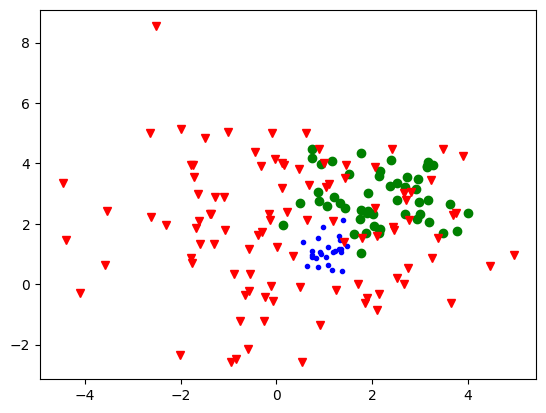

In [4]:
data = dataset.tensors[0]
labels = dataset.tensors[1]
for cls in range(numclasses):
    coo = data[torch.where(labels == cls)[0]]
    colorIndex = cls % len(colors)
    shapeIndex = cls % len(shapes)
    marker = f"{colors[colorIndex]}{shapes[shapeIndex]}"
    plt.plot(coo[:, 0], coo[:, 1], marker)
plt.show()



In [5]:
compoundData = Data(dataset)


In [6]:
DEVICE = "cpu"

tuner1 = Tuner(
    net=FFN,
    cv=HoldoutCrossValidation(
        TorchClassifier(data=compoundData, _in=2, out=numclasses),
    ),
    tunableParams={
        # data
        BATCH_SIZE: [20, 40],
        # model
        LEARNING_RATE: [0.01, 0.1],
        OPTIMIZER: ["SGD"],
        DEPTH: [4, 8],
        NUMBER_OF_HIDDEN_PARAMS: [32, 128],
        DROPOUT_RATE: [0.2, 0.5, 0.7],
        ENABLE_BATCHNORM: [True],
        ACTIVATION_FUNCTION: ["ReLU"],
    },
    device=DEVICE,
    filename="results.txt",
)
tuner1.fit()

numberOfEpochs: 100, testSize: 0.2, validationSize: 0.2
device: cpu, cvType: HoldoutCrossValidation
param: 0, dataHyperParams: {'batchSize': 20}, modelHyperParams: {'learningRate': 0.01, 'optimizer': 'SGD', 'depth': 4, 'numOfHiddenParams': 32, 'dropoutRate': 0.2, 'enableBatchNorm': True, 'activationFunction': 'ReLU'}
epoch: 1, trainScores: {'Accuracy': 37.77777862548828, 'Loss': 1.1074610948562622}, validationScores: {'Accuracy': 16.25, 'Loss': 1.1246917247772217}
epoch: 2, trainScores: {'Accuracy': 40.83333206176758, 'Loss': 1.072527527809143}, validationScores: {'Accuracy': 31.25, 'Loss': 1.1007155179977417}
epoch: 3, trainScores: {'Accuracy': 46.38888931274414, 'Loss': 1.0364328622817993}, validationScores: {'Accuracy': 42.5, 'Loss': 1.0807303190231323}
epoch: 4, trainScores: {'Accuracy': 50.83333206176758, 'Loss': 1.0242148637771606}, validationScores: {'Accuracy': 42.5, 'Loss': 1.0601954460144043}
epoch: 5, trainScores: {'Accuracy': 53.88888931274414, 'Loss': 0.9915268421173096}, 